In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../pyLDLE2/')

In [2]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
from scipy.stats import chi2

import bx_util

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [3]:
vis = visualize_.Visualize()

In [4]:
X, labelsMat, ddX = datasets.Datasets().circular_disk_sauer(n=12500, noise=0.05, noise_type='uniform')

X.shape =  (7430, 3)


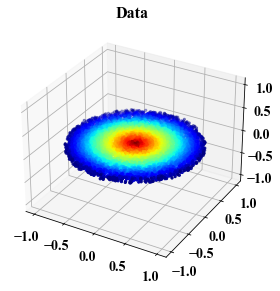

In [5]:
vis.data(X, ddX)

In [11]:
opts = bx_util.default_opts
opts['k_nn'] = 256
opts['k_tune'] = 256
opts['ds'] = True
opts['s'] = 0.3
opts['local_pca'] = True
bx_ds, bx_init_ds = bx_util.estimate_bx(X)

h: 0.07381973835534016
Sinkhorn converged at iter: 2805
s: 0.3


In [12]:
opts['ds'] = False
bx, bx_init = bx_util.estimate_bx(X)

h: 0.07381973835534016


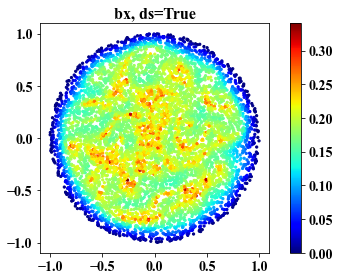

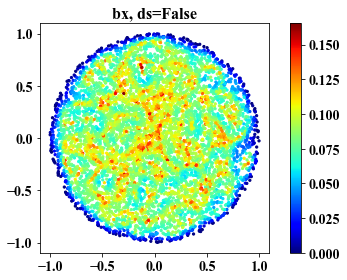

In [13]:
vis.data(X[:,:2], bx_ds, title='bx, ds=True', colorbar=True)
vis.data(X[:,:2], bx, title='bx, ds=False', colorbar=True)

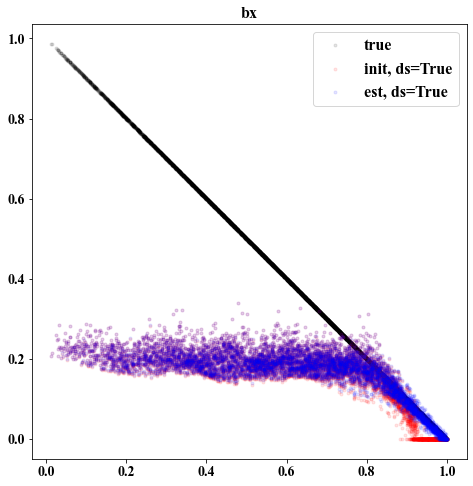

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='k', label='true', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_init_ds, color='r', label='init, ds=True', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_ds, color='b', label='est, ds=True', alpha=0.1)
plt.axis('image')
plt.title('bx')
plt.legend()

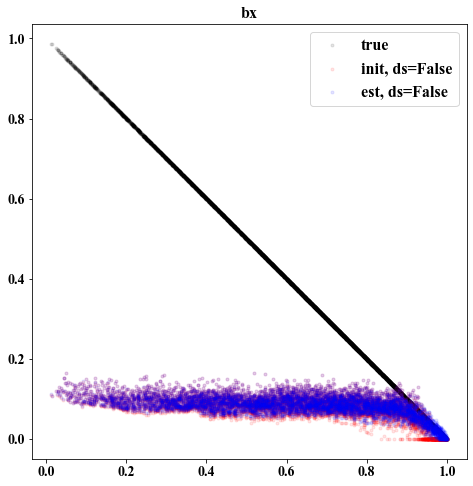

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='k', label='true', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_init, color='r', label='init, ds=False', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx, color='b', label='est, ds=False', alpha=0.1)
plt.title('bx')
plt.axis('image')
plt.legend()

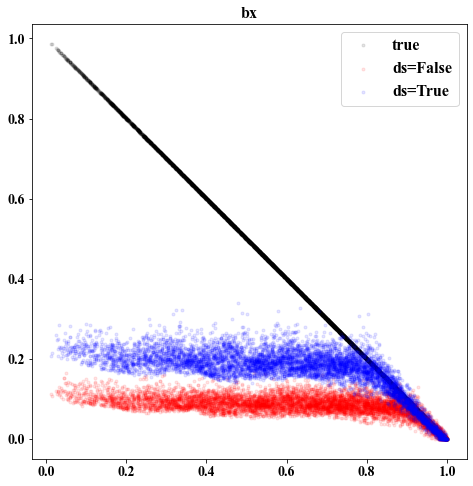

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), ddX, color='k', label='true', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx, color='r', label='ds=False', alpha=0.1)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), bx_ds, color='b', label='ds=True', alpha=0.1)
plt.title('bx')
plt.axis('image')
plt.legend()

In [42]:
opts2 = bx_util.default_opts
opts2['k_nn'] = 256
opts2['k_tune'] = 256
opts2['ds'] = True
opts2['s'] = 0.95

q_ds = bx_util.estimate_q(X, opts=opts2, bx=bx_ds)

h: 0.07381973835534016
Sinkhorn converged at iter: 2805
s: 0.95


In [43]:
opts2['ds'] = False
q1 = bx_util.estimate_q(X, opts=opts2, bx=bx)
q2 = bx_util.estimate_q(X, opts=opts2, bx=bx_ds)

h: 0.07381973835534016
h: 0.07381973835534016


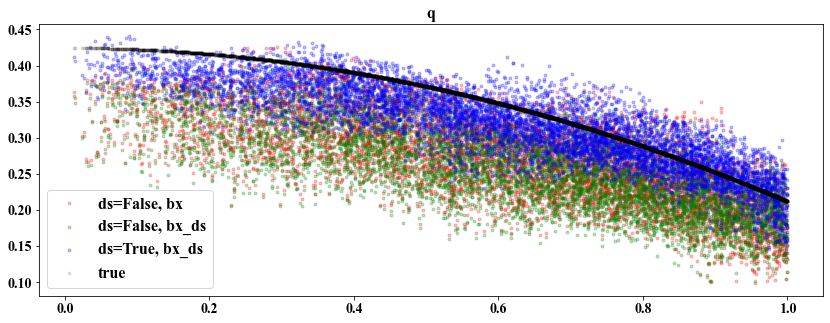

In [44]:
plt.figure(figsize=(20, 5))
plt.scatter(np.linalg.norm(X[:,:2], axis=1), q1, color='r', label='ds=False, bx', alpha=0.25)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), q2, color='g', label='ds=False, bx_ds', alpha=0.25)
plt.scatter(np.linalg.norm(X[:,:2], axis=1), q_ds, color='b', label='ds=True, bx_ds', alpha=0.25)
r = np.linalg.norm(X[:,:2], axis=1)
plt.scatter(r, (2/(3*np.pi))*(2-r**2), color='k', label='true', alpha=0.1)
plt.title('q')
plt.legend()
plt.axis('image')
plt.show()

# Multiple runs

seed: 102
X.shape =  (7339, 2)
h: 0.0726481156662738
Sinkhorn converged at iter: 2311
s: 0.3
h: 0.0726481156662738
h: 0.0726481156662738
Sinkhorn converged at iter: 2311
s: 0.9
h: 0.0726481156662738
h: 0.0726481156662738


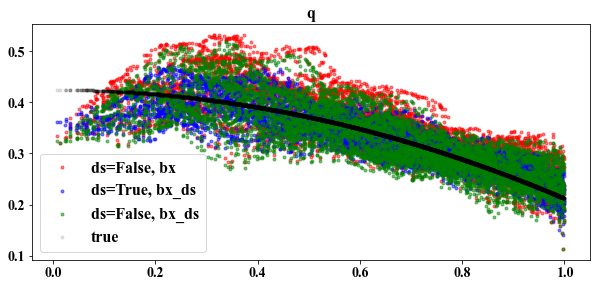

seed: 435
X.shape =  (7431, 2)
h: 0.07110663572999319
Sinkhorn converged at iter: 2781
s: 0.3
h: 0.07110663572999319
h: 0.07110663572999319
Sinkhorn converged at iter: 2781
s: 0.9
h: 0.07110663572999319
h: 0.07110663572999319


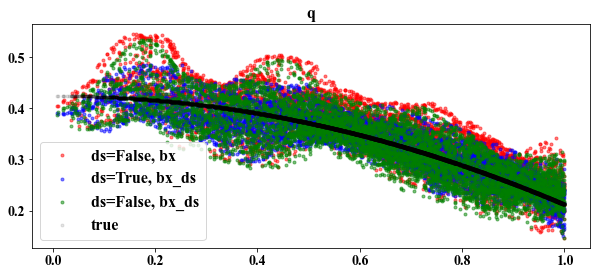

seed: 860
X.shape =  (7304, 2)
h: 0.07224167765015554
Sinkhorn converged at iter: 2713
s: 0.3
h: 0.07224167765015554
h: 0.07224167765015554
Sinkhorn converged at iter: 2713
s: 0.9
h: 0.07224167765015554
h: 0.07224167765015554


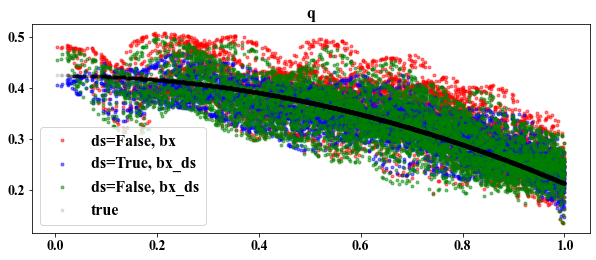

seed: 270
X.shape =  (7378, 2)
h: 0.07385188034643465
Sinkhorn converged at iter: 2766
s: 0.3
h: 0.07385188034643465
h: 0.07385188034643465
Sinkhorn converged at iter: 2766
s: 0.9
h: 0.07385188034643465
h: 0.07385188034643465


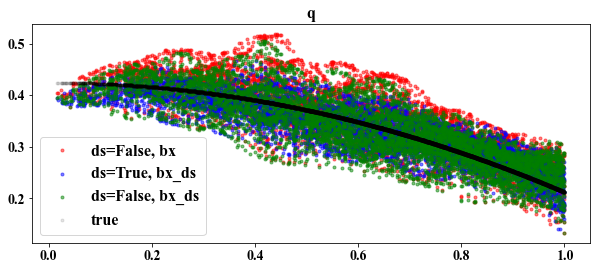

seed: 106
X.shape =  (7372, 2)
h: 0.07392237851165495
Sinkhorn converged at iter: 2678
s: 0.3
h: 0.07392237851165495
h: 0.07392237851165495
Sinkhorn converged at iter: 2678
s: 0.9
h: 0.07392237851165495
h: 0.07392237851165495


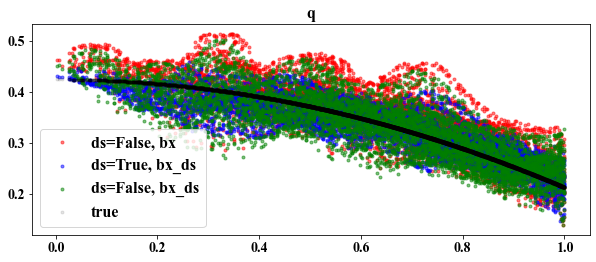

seed: 71
X.shape =  (7358, 2)
h: 0.07282603909887843
Sinkhorn converged at iter: 2709
s: 0.3
h: 0.07282603909887843
h: 0.07282603909887843
Sinkhorn converged at iter: 2709
s: 0.9
h: 0.07282603909887843
h: 0.07282603909887843


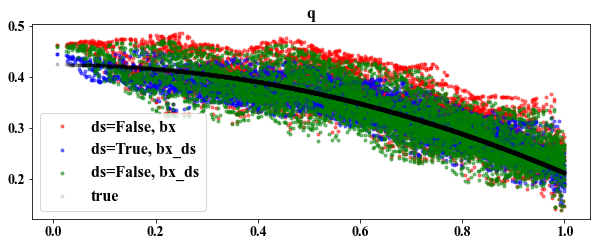

seed: 700
X.shape =  (7421, 2)
h: 0.07250626397026035
Sinkhorn converged at iter: 2881
s: 0.3
h: 0.07250626397026035
h: 0.07250626397026035
Sinkhorn converged at iter: 2881
s: 0.9
h: 0.07250626397026035
h: 0.07250626397026035


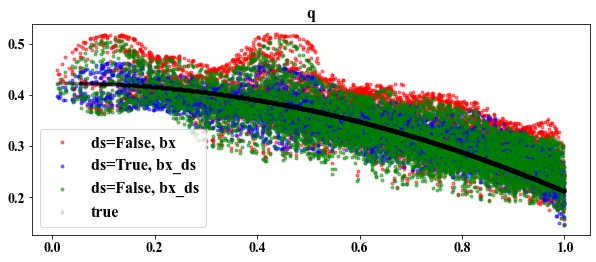

seed: 20
X.shape =  (7414, 2)
h: 0.06995279798653735
Sinkhorn converged at iter: 3009
s: 0.3
h: 0.06995279798653735
h: 0.06995279798653735
Sinkhorn converged at iter: 3009
s: 0.9
h: 0.06995279798653735
h: 0.06995279798653735


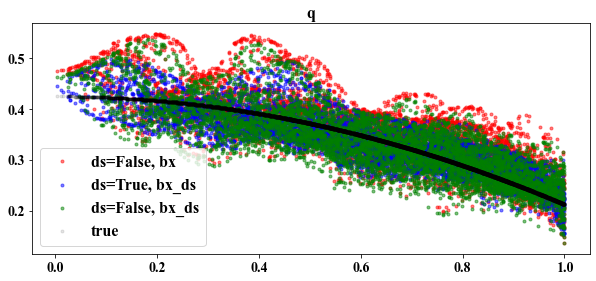

seed: 614
X.shape =  (7335, 2)
h: 0.07415660492262974
Sinkhorn converged at iter: 2694
s: 0.3
h: 0.07415660492262974
h: 0.07415660492262974
Sinkhorn converged at iter: 2694
s: 0.9
h: 0.07415660492262974
h: 0.07415660492262974


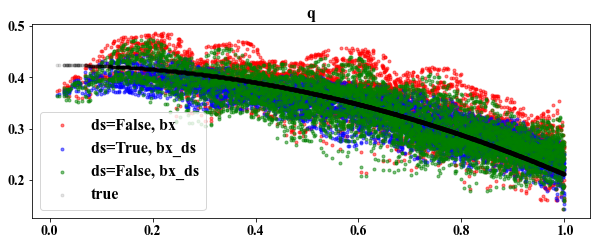

seed: 121
X.shape =  (7324, 2)
h: 0.07220967398394379
Sinkhorn converged at iter: 2614
s: 0.3
h: 0.07220967398394379
h: 0.07220967398394379
Sinkhorn converged at iter: 2614
s: 0.9
h: 0.07220967398394379
h: 0.07220967398394379


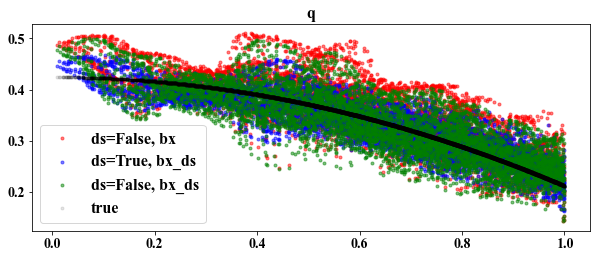

seed: 466
X.shape =  (7399, 2)
h: 0.07113989710869711
Sinkhorn converged at iter: 2456
s: 0.3
h: 0.07113989710869711
h: 0.07113989710869711
Sinkhorn converged at iter: 2456
s: 0.9
h: 0.07113989710869711
h: 0.07113989710869711


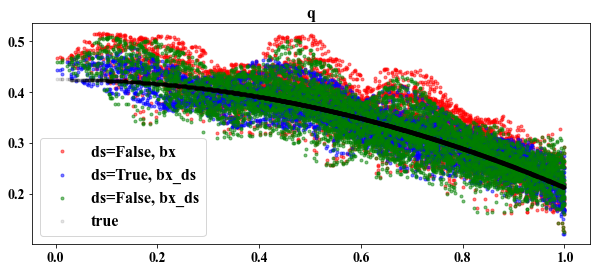

seed: 214
X.shape =  (7360, 2)
h: 0.07244969110517437
Sinkhorn converged at iter: 2812
s: 0.3
h: 0.07244969110517437
h: 0.07244969110517437
Sinkhorn converged at iter: 2812
s: 0.9
h: 0.07244969110517437
h: 0.07244969110517437


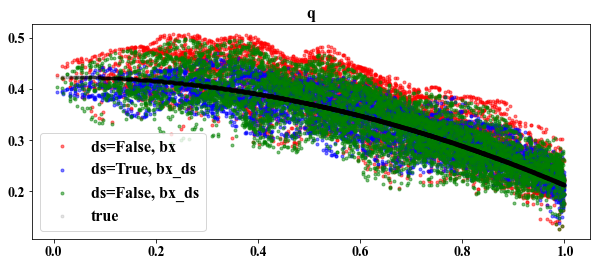

seed: 330
X.shape =  (7281, 2)
h: 0.07275506623991862
Sinkhorn converged at iter: 2595
s: 0.3
h: 0.07275506623991862
h: 0.07275506623991862
Sinkhorn converged at iter: 2595
s: 0.9
h: 0.07275506623991862
h: 0.07275506623991862


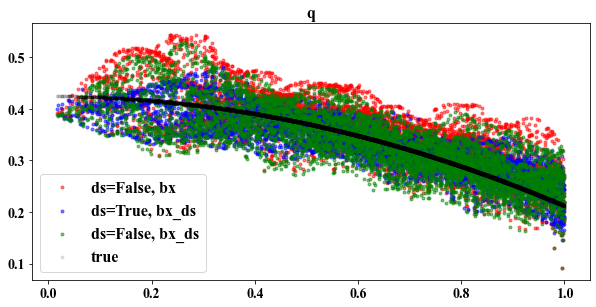

seed: 458
X.shape =  (7289, 2)
h: 0.07102947543382321
Sinkhorn converged at iter: 2916
s: 0.3
h: 0.07102947543382321
h: 0.07102947543382321
Sinkhorn converged at iter: 2916
s: 0.9
h: 0.07102947543382321
h: 0.07102947543382321


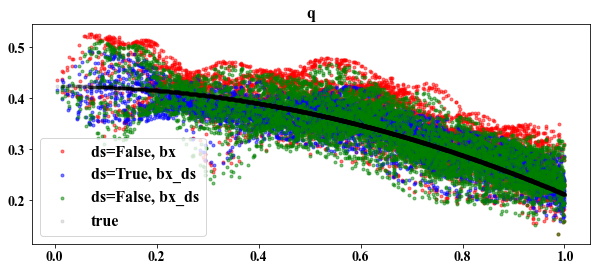

seed: 87
X.shape =  (7451, 2)
h: 0.07373697106988933
Sinkhorn converged at iter: 2648
s: 0.3
h: 0.07373697106988933
h: 0.07373697106988933
Sinkhorn converged at iter: 2648
s: 0.9
h: 0.07373697106988933
h: 0.07373697106988933


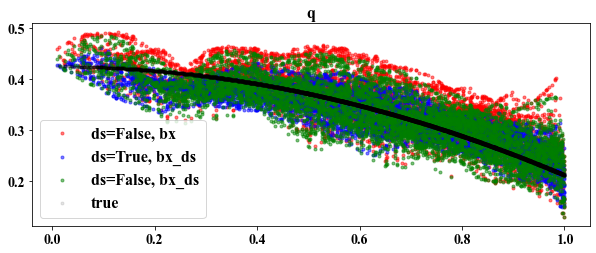

seed: 372
X.shape =  (7350, 2)
h: 0.07337324275956676
Sinkhorn converged at iter: 2714
s: 0.3
h: 0.07337324275956676
h: 0.07337324275956676
Sinkhorn converged at iter: 2714
s: 0.9
h: 0.07337324275956676
h: 0.07337324275956676


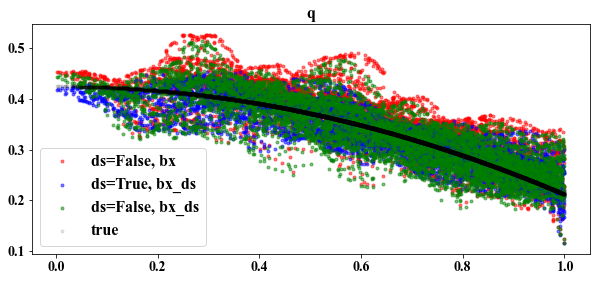

seed: 99
X.shape =  (7339, 2)
h: 0.07315680699552085
Sinkhorn converged at iter: 2665
s: 0.3
h: 0.07315680699552085
h: 0.07315680699552085
Sinkhorn converged at iter: 2665
s: 0.9
h: 0.07315680699552085
h: 0.07315680699552085


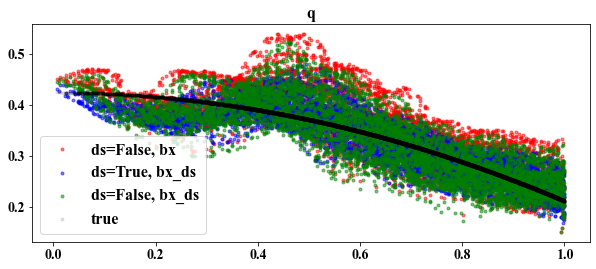

seed: 871
X.shape =  (7343, 2)
h: 0.07485902897403572
Sinkhorn converged at iter: 2588
s: 0.3
h: 0.07485902897403572
h: 0.07485902897403572
Sinkhorn converged at iter: 2588
s: 0.9
h: 0.07485902897403572
h: 0.07485902897403572


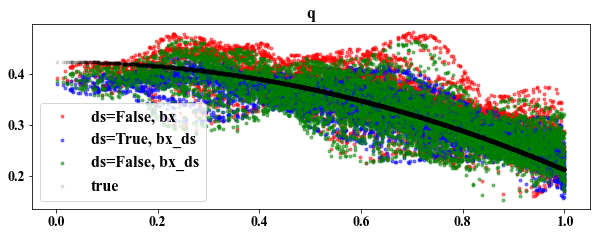

seed: 663
X.shape =  (7300, 2)
h: 0.07184211197998416
Sinkhorn converged at iter: 2793
s: 0.3
h: 0.07184211197998416
h: 0.07184211197998416
Sinkhorn converged at iter: 2793
s: 0.9
h: 0.07184211197998416
h: 0.07184211197998416


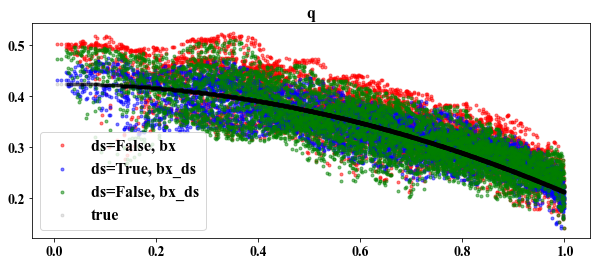

seed: 130
X.shape =  (7284, 2)
h: 0.07269730065227785
Sinkhorn converged at iter: 2789
s: 0.3
h: 0.07269730065227785
h: 0.07269730065227785
Sinkhorn converged at iter: 2789
s: 0.9
h: 0.07269730065227785
h: 0.07269730065227785


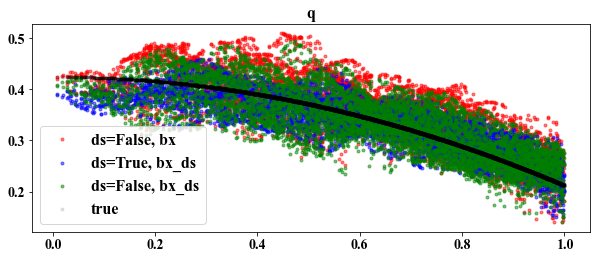

seed: 661
X.shape =  (7426, 2)
h: 0.07418533618318901
Sinkhorn converged at iter: 2696
s: 0.3
h: 0.07418533618318901
h: 0.07418533618318901
Sinkhorn converged at iter: 2696
s: 0.9
h: 0.07418533618318901
h: 0.07418533618318901


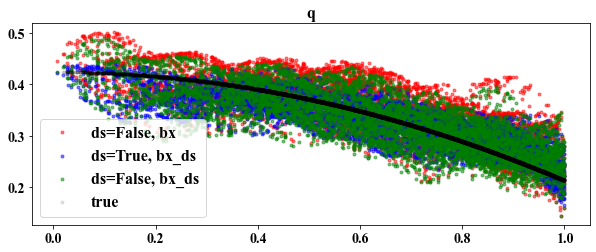

seed: 308
X.shape =  (7377, 2)
h: 0.07258418355993242
Sinkhorn converged at iter: 2835
s: 0.3
h: 0.07258418355993242
h: 0.07258418355993242
Sinkhorn converged at iter: 2835
s: 0.9
h: 0.07258418355993242
h: 0.07258418355993242


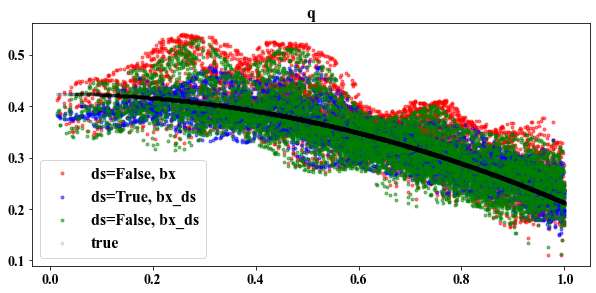

seed: 769
X.shape =  (7296, 2)
h: 0.07293621685001433
Sinkhorn converged at iter: 2527
s: 0.3
h: 0.07293621685001433
h: 0.07293621685001433
Sinkhorn converged at iter: 2527
s: 0.9
h: 0.07293621685001433
h: 0.07293621685001433


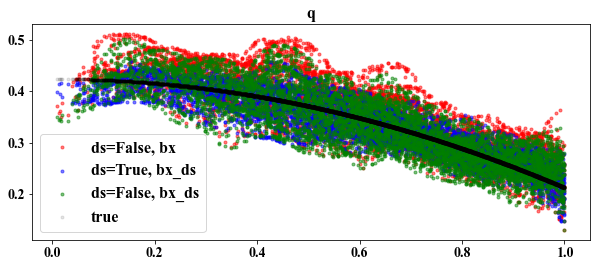

seed: 343
X.shape =  (7327, 2)
h: 0.07294307274739183
Sinkhorn converged at iter: 2545
s: 0.3
h: 0.07294307274739183
h: 0.07294307274739183
Sinkhorn converged at iter: 2545
s: 0.9
h: 0.07294307274739183
h: 0.07294307274739183


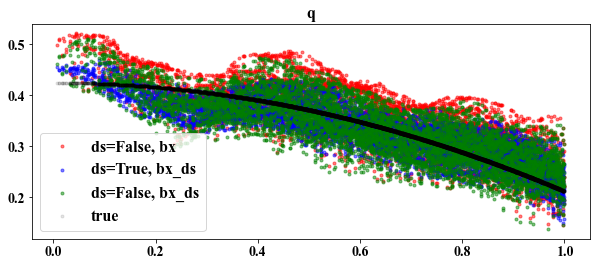

seed: 491
X.shape =  (7434, 2)
h: 0.07326210702827894
Sinkhorn converged at iter: 2648
s: 0.3
h: 0.07326210702827894
h: 0.07326210702827894
Sinkhorn converged at iter: 2648
s: 0.9
h: 0.07326210702827894
h: 0.07326210702827894


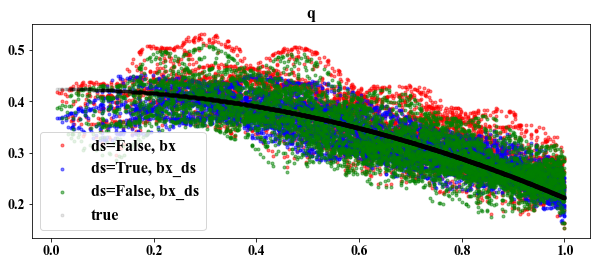

seed: 413
X.shape =  (7353, 2)
h: 0.07286717894446215
Sinkhorn converged at iter: 2776
s: 0.3
h: 0.07286717894446215
h: 0.07286717894446215
Sinkhorn converged at iter: 2776
s: 0.9
h: 0.07286717894446215
h: 0.07286717894446215


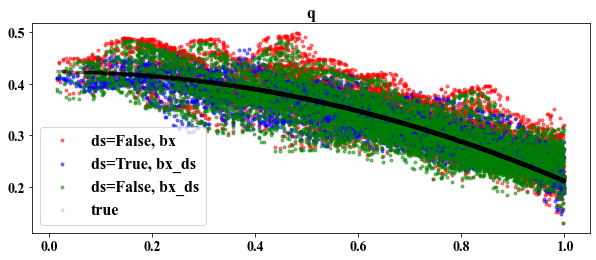

seed: 805
X.shape =  (7323, 2)
h: 0.0723291795345089
Sinkhorn converged at iter: 2805
s: 0.3
h: 0.0723291795345089
h: 0.0723291795345089
Sinkhorn converged at iter: 2805
s: 0.9
h: 0.0723291795345089
h: 0.0723291795345089


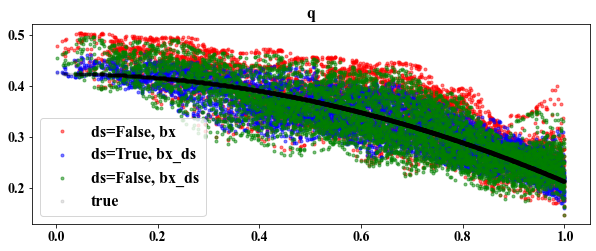

seed: 385
X.shape =  (7405, 2)
h: 0.073707831650856
Sinkhorn converged at iter: 2804
s: 0.3
h: 0.073707831650856
h: 0.073707831650856
Sinkhorn converged at iter: 2804
s: 0.9
h: 0.073707831650856
h: 0.073707831650856


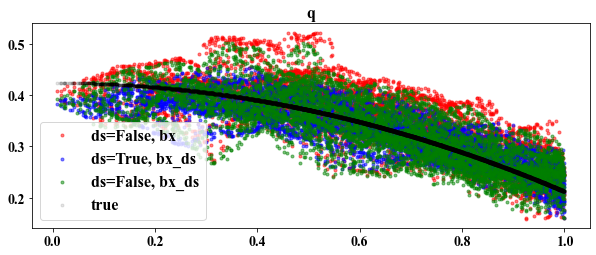

seed: 191
X.shape =  (7325, 2)
h: 0.07180329754512933
Sinkhorn converged at iter: 2919
s: 0.3
h: 0.07180329754512933
h: 0.07180329754512933
Sinkhorn converged at iter: 2919
s: 0.9
h: 0.07180329754512933
h: 0.07180329754512933


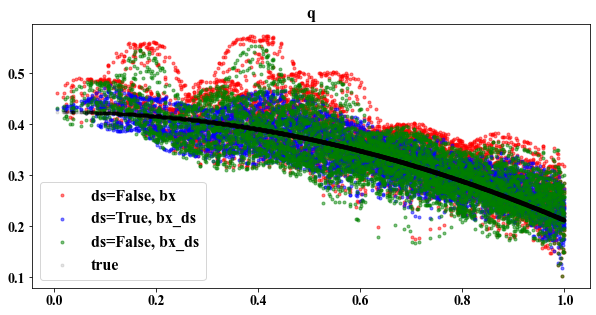

seed: 955
X.shape =  (7408, 2)
h: 0.07106884029420184
Sinkhorn converged at iter: 2540
s: 0.3
h: 0.07106884029420184
h: 0.07106884029420184
Sinkhorn converged at iter: 2540
s: 0.9
h: 0.07106884029420184
h: 0.07106884029420184


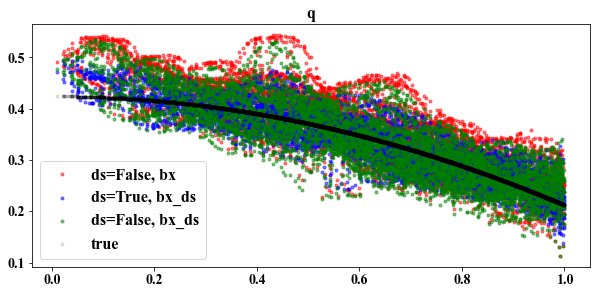

seed: 276
X.shape =  (7250, 2)
h: 0.07408861033393044
Sinkhorn converged at iter: 2763
s: 0.3
h: 0.07408861033393044
h: 0.07408861033393044
Sinkhorn converged at iter: 2763
s: 0.9
h: 0.07408861033393044
h: 0.07408861033393044


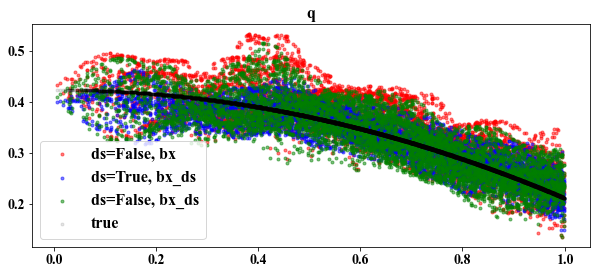

seed: 160
X.shape =  (7359, 2)
h: 0.07234186906542746
Sinkhorn converged at iter: 2636
s: 0.3
h: 0.07234186906542746
h: 0.07234186906542746
Sinkhorn converged at iter: 2636
s: 0.9
h: 0.07234186906542746
h: 0.07234186906542746


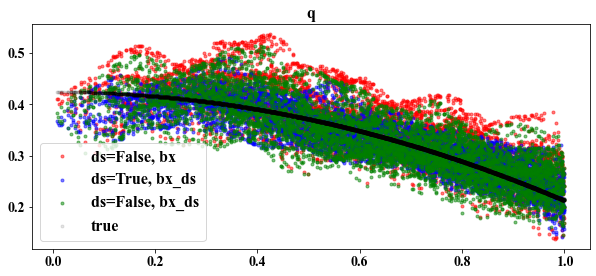

seed: 459
X.shape =  (7286, 2)
h: 0.06963523553512453
Sinkhorn converged at iter: 3007
s: 0.3
h: 0.06963523553512453
h: 0.06963523553512453
Sinkhorn converged at iter: 3007
s: 0.9
h: 0.06963523553512453
h: 0.06963523553512453


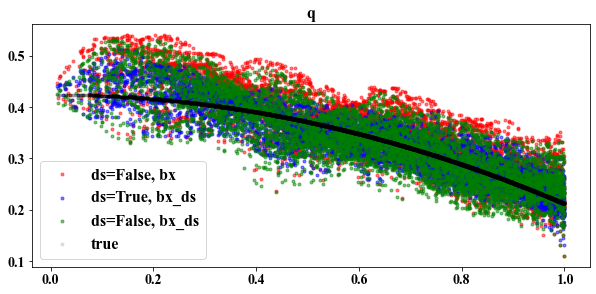

seed: 313
X.shape =  (7390, 2)
h: 0.0720117465524841
Sinkhorn converged at iter: 2433
s: 0.3
h: 0.0720117465524841
h: 0.0720117465524841
Sinkhorn converged at iter: 2433
s: 0.9
h: 0.0720117465524841
h: 0.0720117465524841


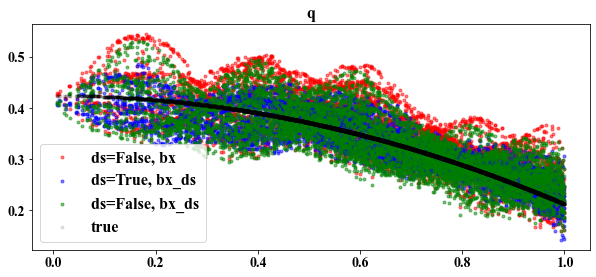

seed: 21
X.shape =  (7422, 2)
h: 0.0729690091695941
Sinkhorn converged at iter: 2620
s: 0.3
h: 0.0729690091695941
h: 0.0729690091695941
Sinkhorn converged at iter: 2620
s: 0.9
h: 0.0729690091695941
h: 0.0729690091695941


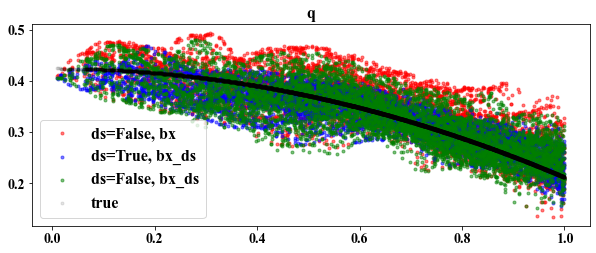

seed: 252
X.shape =  (7382, 2)
h: 0.07160715726059237
Sinkhorn converged at iter: 2817
s: 0.3
h: 0.07160715726059237
h: 0.07160715726059237
Sinkhorn converged at iter: 2817
s: 0.9
h: 0.07160715726059237
h: 0.07160715726059237


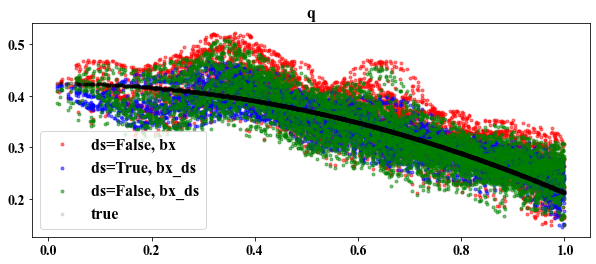

seed: 747
X.shape =  (7341, 2)
h: 0.0737921082602499
Sinkhorn converged at iter: 2734
s: 0.3
h: 0.0737921082602499
h: 0.0737921082602499
Sinkhorn converged at iter: 2734
s: 0.9
h: 0.0737921082602499
h: 0.0737921082602499


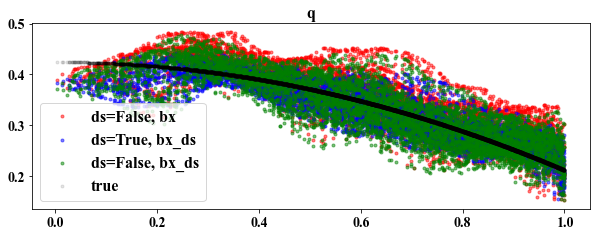

seed: 856
X.shape =  (7316, 2)
h: 0.07344122263841599
Sinkhorn converged at iter: 2751
s: 0.3
h: 0.07344122263841599
h: 0.07344122263841599
Sinkhorn converged at iter: 2751
s: 0.9
h: 0.07344122263841599
h: 0.07344122263841599


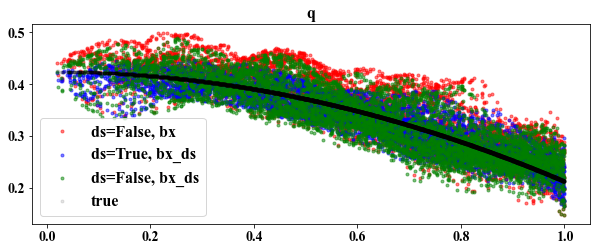

seed: 560
X.shape =  (7386, 2)
h: 0.0724989059861306
Sinkhorn converged at iter: 2818
s: 0.3
h: 0.0724989059861306
h: 0.0724989059861306
Sinkhorn converged at iter: 2818
s: 0.9
h: 0.0724989059861306
h: 0.0724989059861306


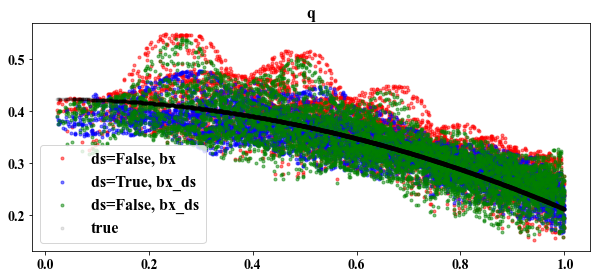

seed: 474
X.shape =  (7404, 2)
h: 0.07207630458213479
Sinkhorn converged at iter: 2841
s: 0.3
h: 0.07207630458213479
h: 0.07207630458213479
Sinkhorn converged at iter: 2841
s: 0.9
h: 0.07207630458213479
h: 0.07207630458213479


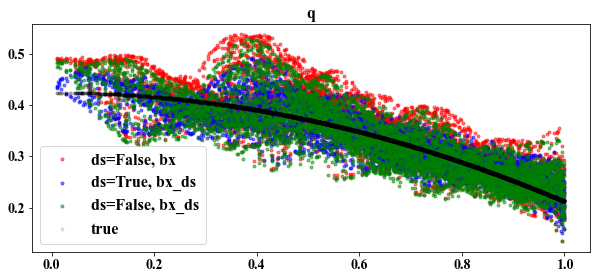

seed: 58
X.shape =  (7362, 2)
h: 0.07277111865300095
Sinkhorn converged at iter: 2587
s: 0.3
h: 0.07277111865300095
h: 0.07277111865300095
Sinkhorn converged at iter: 2587
s: 0.9
h: 0.07277111865300095
h: 0.07277111865300095


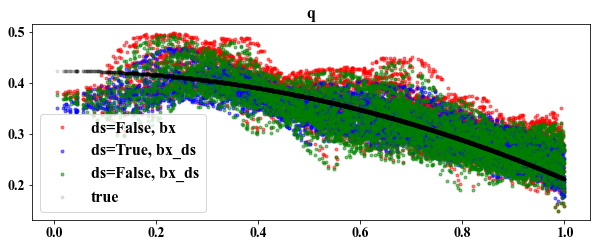

seed: 510
X.shape =  (7352, 2)
h: 0.07351184765175277
Sinkhorn converged at iter: 2604
s: 0.3
h: 0.07351184765175277
h: 0.07351184765175277
Sinkhorn converged at iter: 2604
s: 0.9
h: 0.07351184765175277
h: 0.07351184765175277


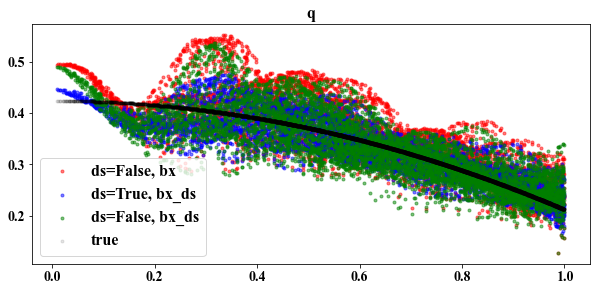

seed: 681
X.shape =  (7298, 2)
h: 0.07243660024791053
Sinkhorn converged at iter: 2831
s: 0.3
h: 0.07243660024791053
h: 0.07243660024791053
Sinkhorn converged at iter: 2831
s: 0.9
h: 0.07243660024791053
h: 0.07243660024791053


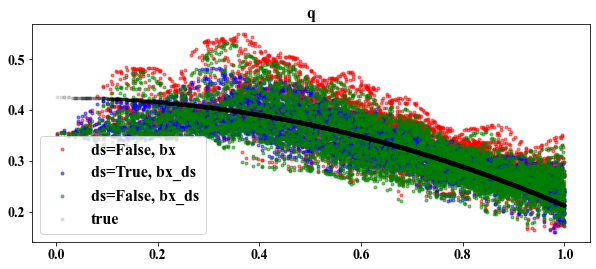

seed: 475
X.shape =  (7461, 2)
h: 0.07344278641210639
Sinkhorn converged at iter: 2777
s: 0.3
h: 0.07344278641210639
h: 0.07344278641210639
Sinkhorn converged at iter: 2777
s: 0.9
h: 0.07344278641210639
h: 0.07344278641210639


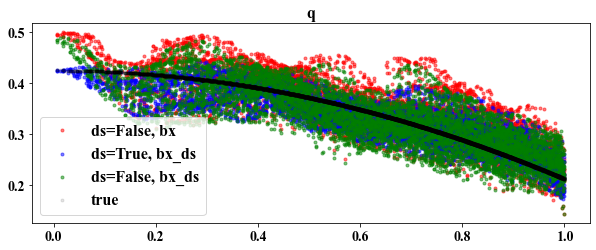

seed: 699
X.shape =  (7314, 2)
h: 0.07015220176951645
Sinkhorn converged at iter: 2851
s: 0.3
h: 0.07015220176951645
h: 0.07015220176951645
Sinkhorn converged at iter: 2851
s: 0.9
h: 0.07015220176951645
h: 0.07015220176951645


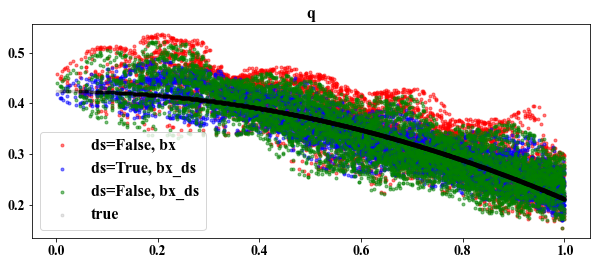

seed: 975
X.shape =  (7310, 2)
h: 0.07358332776824461
Sinkhorn converged at iter: 2711
s: 0.3
h: 0.07358332776824461
h: 0.07358332776824461
Sinkhorn converged at iter: 2711
s: 0.9
h: 0.07358332776824461
h: 0.07358332776824461


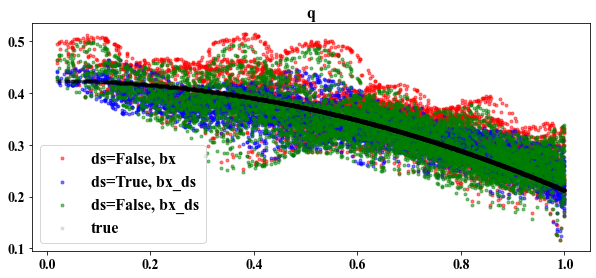

seed: 782
X.shape =  (7338, 2)
h: 0.07300566635008286
Sinkhorn converged at iter: 2755
s: 0.3
h: 0.07300566635008286
h: 0.07300566635008286
Sinkhorn converged at iter: 2755
s: 0.9
h: 0.07300566635008286
h: 0.07300566635008286


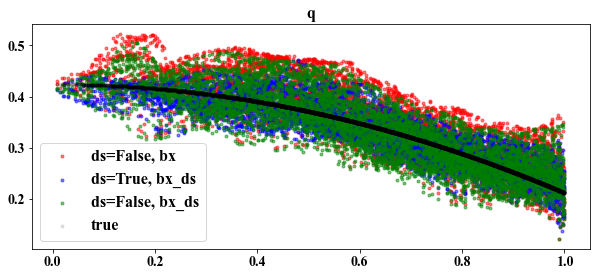

seed: 189
X.shape =  (7394, 2)
h: 0.07277498378091227
Sinkhorn converged at iter: 2506
s: 0.3
h: 0.07277498378091227
h: 0.07277498378091227
Sinkhorn converged at iter: 2506
s: 0.9
h: 0.07277498378091227
h: 0.07277498378091227


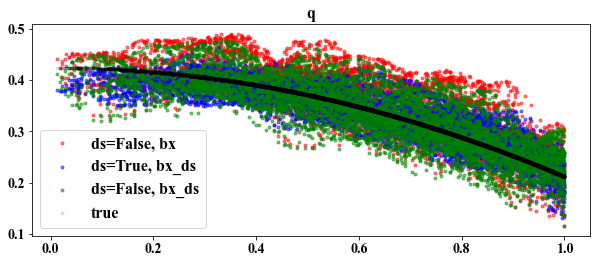

seed: 957
X.shape =  (7339, 2)
h: 0.07114702606728324
Sinkhorn converged at iter: 2508
s: 0.3
h: 0.07114702606728324
h: 0.07114702606728324
Sinkhorn converged at iter: 2508
s: 0.9
h: 0.07114702606728324
h: 0.07114702606728324


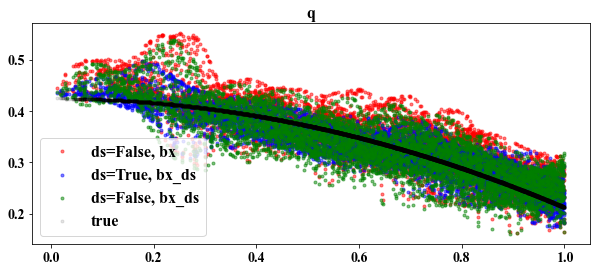

seed: 686
X.shape =  (7439, 2)
h: 0.0727633056243375
Sinkhorn converged at iter: 2415
s: 0.3
h: 0.0727633056243375
h: 0.0727633056243375
Sinkhorn converged at iter: 2415
s: 0.9
h: 0.0727633056243375
h: 0.0727633056243375


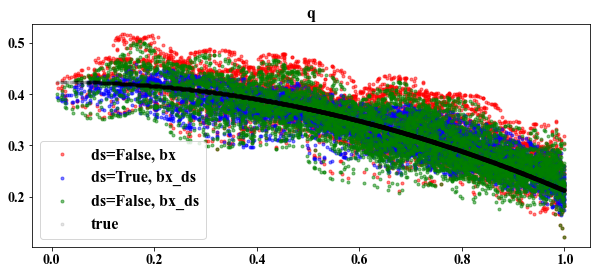

In [58]:
q_ds_all = []
q1_all = []
q2_all = []
r_all = []
n_runs = 50
np.random.seed(42)
seeds = np.random.randint(0, 1000, n_runs)

for seed in seeds.tolist():
    print('seed:', seed)
    X, labelsMat, ddX = datasets.Datasets().circular_disk_sauer(n=12500, seed=seed)
    
    opts = bx_util.default_opts
    opts['k_nn'] = 256
    opts['k_tune'] = 256
    opts['ds'] = True
    opts['s'] = 0.3
    bx_ds, bx_init_ds = bx_util.estimate_bx(X)
    
    opts['ds'] = False
    bx, bx_init = bx_util.estimate_bx(X)
    
    opts2 = bx_util.default_opts
    opts2['k_nn'] = 256
    opts2['k_tune'] = 256
    opts2['ds'] = True
    opts2['s'] = 0.9

    q_ds = bx_util.estimate_q(X, opts=opts2, bx=bx_ds)
    
    opts2['ds'] = False
    q1 = bx_util.estimate_q(X, opts=opts2, bx=bx)
    q2 = bx_util.estimate_q(X, opts=opts2, bx=bx_ds)
    
    
    plt.figure(figsize=(10, 5))
    plt.scatter(np.linalg.norm(X[:,:2], axis=1), q1, color='r', label='ds=False, bx', alpha=0.5)
    plt.scatter(np.linalg.norm(X[:,:2], axis=1), q_ds, color='b', label='ds=True, bx_ds', alpha=0.5)
    plt.scatter(np.linalg.norm(X[:,:2], axis=1), q2, color='g', label='ds=False, bx_ds', alpha=0.5)
    r = np.linalg.norm(X[:,:2], axis=1)
    plt.scatter(r, (2/(3*np.pi))*(2-r**2), color='k', label='true', alpha=0.1)
    plt.title('q')
    plt.legend()
    plt.axis('image')
    plt.show()
    
    r_all.append(r)
    q_ds_all.append(q_ds)
    q1_all.append(q1)
    q2_all.append(q2)

In [61]:
from scipy import interpolate


q_ds_final = 0
q1_final = 0
q2_final = 0
r_min = 0
r_max = 1
for i in range(len(r_all)):
    r_min = max(r_min, np.min(r_all[i]))
    r_max = min(r_max, np.max(r_all[i]))

r_final = np.linspace(r_min, r_max, 100)

for i in range(len(r_all)):
    f_ds = interpolate.interp1d(r_all[i].flatten(), q_ds_all[i].flatten())
    f1 = interpolate.interp1d(r_all[i].flatten(), q1_all[i].flatten())
    f2 = interpolate.interp1d(r_all[i].flatten(), q2_all[i].flatten())
    
    q_ds_final += f_ds(r_final)
    q1_final += f1(r_final)
    q2_final += f2(r_final)

q_ds_final /= len(r_all)
q1_final /= len(r_all)
q2_final /= len(r_all)

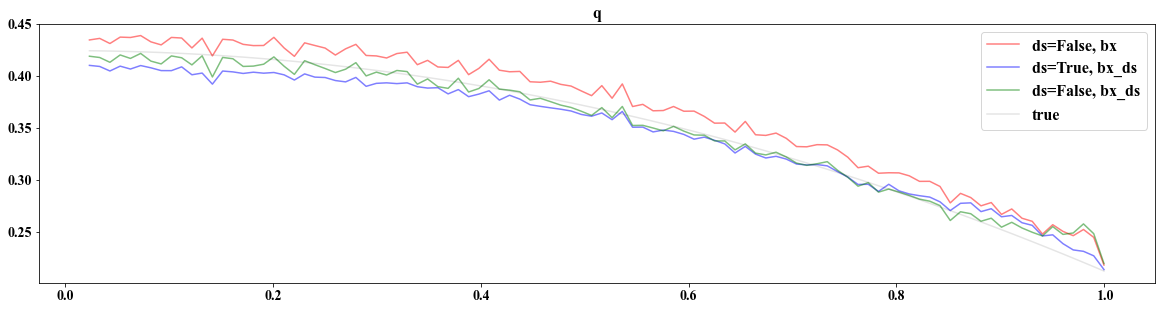

In [62]:
plt.figure(figsize=(20, 8))
plt.plot(r_final, q1_final, color='r', label='ds=False, bx', alpha=0.5)
plt.plot(r_final, q_ds_final, color='b', label='ds=True, bx_ds', alpha=0.5)
plt.plot(r_final, q2_final, color='g', label='ds=False, bx_ds', alpha=0.5)
plt.plot(r_final, (2/(3*np.pi))*(2-r_final**2), color='k', label='true', alpha=0.1)
plt.title('q')
plt.legend()
plt.axis('image')
plt.show()